Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD deaths, with one-third of these deaths occurring before the age of 70. A comprehensive database for factors that contribute to a heart attack has been constructed.

The main purpose here is to collect characteristics of Heart Attack or factors that contribute to it. The size of the dataset is 1319 samples, which have nine fields, where eight fields are for input fields and one field for an output field. Age, gender(0 for Female, 1 for Male) ,heart rate (impulse), systolic BP (pressurehight), diastolic BP (pressurelow), blood sugar(glucose), CK-MB (kcm), and Test-Troponin (troponin) are representing the input fields, while the output field pertains to the presence of heart attack (class), which is divided into two categories (negative and positive); negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('./data/Heart Attack.csv')

In [3]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
df = df[(df['pressurelow'] <= 370) & (df['pressurelow'] > 0)].reset_index(drop=True)
df = df[(df['pressurehight'] <= 370) & (df['pressurehight'] > 0)].reset_index(drop=True)
df = df[df['pressurehight'] >= df['pressurelow']].reset_index(drop=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
lebel_encoder = LabelEncoder()
df['class'] = lebel_encoder.fit_transform(df['class'])

In [9]:
y = df['class']
X = df.drop('class', axis=1)

In [10]:
X

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1306,44,1,94,122,67,204.0,1.63,0.006
1307,66,1,84,125,55,149.0,1.33,0.172
1308,45,1,85,168,104,96.0,1.24,4.250
1309,54,1,58,117,68,443.0,5.80,0.359


In [11]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1306    0
1307    1
1308    1
1309    1
1310    1
Name: class, Length: 1311, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2 , random_state=42)

In [13]:
y.value_counts()

class
1    808
0    503
Name: count, dtype: int64

In [109]:
logreg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [78]:
y

0       negative
1       positive
2       negative
3       positive
4       negative
          ...   
1306    negative
1307    positive
1308    positive
1309    positive
1310    positive
Name: class, Length: 1311, dtype: object

In [ ]:
np.exp(logreg.coef_)

array([[  1.03194537,   0.99581757,   0.99999199,   0.9926153 ,
          0.9882351 ,   0.99793378,   1.40159565, 969.92890344]])

In [94]:
from scipy.stats import *
import statsmodels.api as sm

In [38]:
zscore(X_train)

array([[-0.59634215, -1.39420953, -0.34157769, ..., -0.57460928,
        -0.22645913, -0.30200497],
       [ 0.35971403,  0.7172523 , -0.7081515 , ..., -0.9387716 ,
        -0.19857147, -0.28824361],
       [-0.59634215,  0.7172523 ,  0.36337194, ..., -0.75669044,
        -0.27482679, -0.26347316],
       ...,
       [-1.18468442,  0.7172523 , -0.56716157, ..., -0.52258609,
        -0.27961998, -0.30934436],
       [ 1.53639857, -1.39420953,  0.36337194, ..., -0.14541797,
        -0.25761488, -0.2726474 ],
       [-0.96405607,  0.7172523 ,  0.36337194, ..., -0.4965745 ,
        -0.114037  , -0.30659209]], shape=(1048, 8))

In [47]:
print(df.dtypes)

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object


In [14]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.125400
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 1048
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            8
Date:                Thu, 13 Nov 2025   Pseudo R-squ.:                  0.8115
Time:                        14:08:26   Log-Likelihood:                -131.42
converged:                       True   LL-Null:                       -697.27
Covariance Type:            nonrobust   LLR p-value:                5.424e-239
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.1220      1.557     -5.216      0.000     -11.174      -5.070
age              -0

Classification models

In [15]:
classification_models = {'logreg':LogisticRegression(class_weight='balanced'), 'ridge':RidgeClassifierCV(cv = 5 , alphas=[1e-3, 1e-2, 1], class_weight='balanced'), 'decision_tree': DecisionTreeClassifier(max_depth= 5)
, 'knn':KNeighborsClassifier(n_neighbors=5), 'NB': GaussianNB(), 'gb':GradientBoostingClassifier(n_estimators=240), 'RF':RandomForestClassifier(max_depth=10, class_weight='balanced')}

In [ ]:
results = {}
for model_name, model in classification_models.items():
    print(f"Training {model_name}...")
    
    # Fit the model
    model_fitted = model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model_fitted.predict(X_train)
    y_test_pred = model_fitted.predict(X_test)
    
    results[model_name] = {
        'fitted': model_fitted,
        'preds': y_test_pred
    }
    
    if model_name == 'ridge':
        results[model_name]['probs'] = None
        results[model_name]['ROC_AUC_test'] = 0
    else:
        y_test_prob = model_fitted.predict_proba(X_test)[:, 1] 
        results[model_name]['probs'] = y_test_prob
        results[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test, y_test_prob)
    
    # Calculate all metrics
    results[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train, y_train_pred)
    results[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test, y_test_pred)
    results[model_name]['Recall_train'] = metrics.recall_score(y_train, y_train_pred)
    results[model_name]['Recall_test'] = metrics.recall_score(y_test, y_test_pred)
    results[model_name]['F1_test'] = metrics.f1_score(y_test, y_test_pred)
    results[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test, y_test_pred)
    
    print(f"{model_name} - Accuracy: {results[model_name]['Accuracy_test']:.4f}, "
          f"Recall: {results[model_name]['Recall_test']:.4f}, "
          f"F1: {results[model_name]['F1_test']:.4f}")

Training logreg...
logreg - Accuracy: 0.8175, Recall: 0.7702, F1: 0.8378
Training ridge...
ridge - Accuracy: 0.7148, Recall: 0.7019, F1: 0.7508
Training decision_tree...
decision_tree - Accuracy: 0.9810, Recall: 0.9938, F1: 0.9846
Training knn...


/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


knn - Accuracy: 0.6502, Recall: 0.7826, F1: 0.7326
Training NB...
NB - Accuracy: 0.9087, Recall: 0.8634, F1: 0.9205
Training gb...
gb - Accuracy: 0.9810, Recall: 0.9938, F1: 0.9846
Training RF...
RF - Accuracy: 0.9886, Recall: 0.9938, F1: 0.9907


In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
class_metrics = pd.DataFrame.from_dict(results, 'index')[['Accuracy_train', 'Accuracy_test',
                                                            'Recall_train', 'Recall_test',
                                                            'ROC_AUC_test', 'F1_test', 'MCC_test']]

class_metrics_sorted = class_metrics.sort_values(by='ROC_AUC_test', ascending=False)
print(class_metrics_sorted)

               Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
gb                   1.000000       0.980989      1.000000     0.993789   
RF                   1.000000       0.988593      1.000000     0.993789   
NB                   0.878817       0.908745      0.803709     0.863354   
decision_tree        0.999046       0.980989      0.998454     0.993789   
logreg               0.801527       0.817490      0.724884     0.770186   
knn                  0.757634       0.650190      0.829985     0.782609   
ridge                0.689885       0.714829      0.635240     0.701863   

               ROC_AUC_test   F1_test  MCC_test  
gb                 0.993271  0.984615  0.960025  
RF                 0.992388  0.990712  0.975966  
NB                 0.983802  0.920530  0.824395  
decision_tree      0.977134  0.984615  0.960025  
logreg             0.916088  0.837838  0.645690  
knn                0.670320  0.732558  0.237014  
ridge              0.000000  0.750831  0.426908  

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import math

X_train.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

In [39]:
X_train_abbrev = X_train.iloc[:]
X_test_abbrev = X_test.iloc[:]
sample_size = 0.1
sample_idx = np.random.choice(X_test.shape[0] ,math.ceil(X_test.shape[0]*sample_size), replace=False)
print(sample_idx)
dimred_methods = {
'pca':{'method': PCA(n_components=3,random_state=42)},
't-sne':{'method':TSNE(n_components=3, random_state=42)}
}

[200   9  69  76 260  48 109 138 117  53 133  96 145 139 121 211 250 127
 119 161  30 153   4 197 118  68 126]


In [49]:
for method_name in dimred_methods.keys():
    lowdim_data = dimred_methods[method_name]['method'].fit_transform(X_test_abbrev)
    dimred_methods[method_name]['lowdim'] = lowdim_data

In [47]:
Y_names = {0:'negative', 1:'positive'}

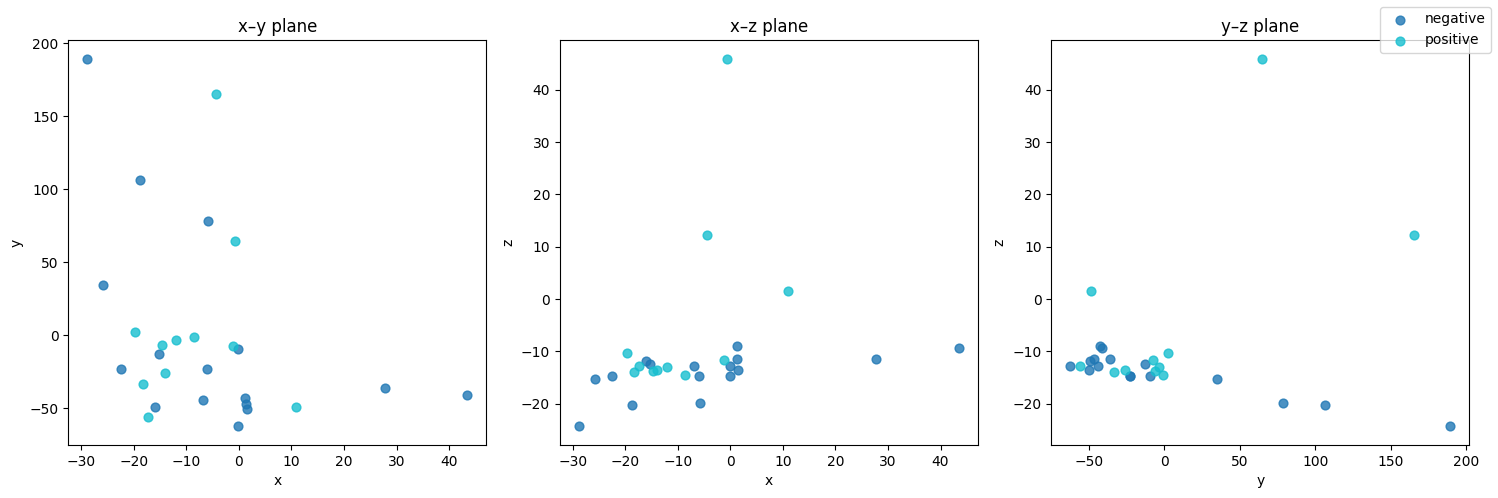

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
X_3d = dimred_methods['pca']['lowdim'][sample_idx]   
y = y_test.values[sample_idx]                       
y_names = Y_names                                    
axis_pairs = [(0, 1), (0, 2), (1, 2)]
axis_labels = [('x', 'y'), ('x', 'z'), ('y', 'z')]
titles = ['x–y plane', 'x–z plane', 'y–z plane']

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

unique_classes = np.unique(y)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))

for ax, (i, j), (xlabel, ylabel), title in zip(axes, axis_pairs, axis_labels, titles):
    for c_idx, cls in enumerate(unique_classes):
        mask = y == cls
        ax.scatter(
            X_3d[mask, i],
            X_3d[mask, j],
            color=colors[c_idx],
            label=y_names[c_idx] if y_names is not None else str(cls),
            s=40,
            alpha=0.8
        )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


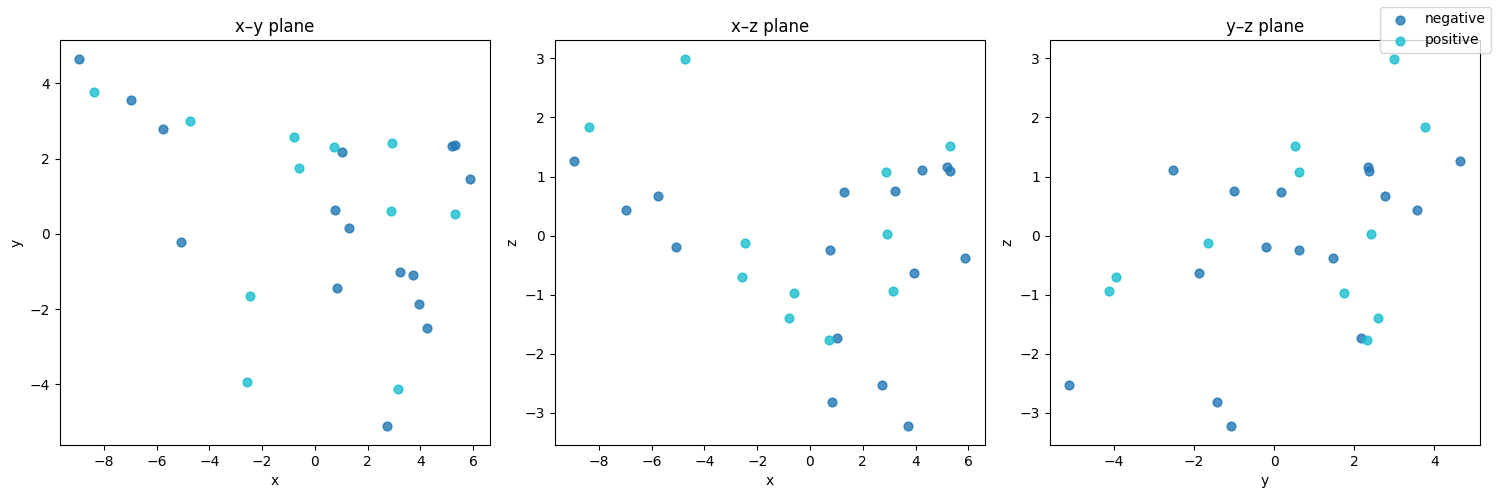

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Data
X_3d = dimred_methods['t-sne']['lowdim'][sample_idx]   
y = y_test.values[sample_idx]                       
y_names = Y_names                                    
axis_pairs = [(0, 1), (0, 2), (1, 2)]
axis_labels = [('x', 'y'), ('x', 'z'), ('y', 'z')]
titles = ['x–y plane', 'x–z plane', 'y–z plane']

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

unique_classes = np.unique(y)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))

for ax, (i, j), (xlabel, ylabel), title in zip(axes, axis_pairs, axis_labels, titles):
    for c_idx, cls in enumerate(unique_classes):
        mask = y == cls
        ax.scatter(
            X_3d[mask, i],
            X_3d[mask, j],
            color=colors[c_idx],
            label=y_names[c_idx] if y_names is not None else str(cls),
            s=40,
            alpha=0.8
        )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()
